# CS4035 - Cyber Data Analytics
## Lab 3 

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 3 contains 4 main questions + 1 bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 

## Group Number :

## Student 1 
### Name : Krzysztof Baran
### ID : 4662148

## Student 2
### Name : Michał Okoń
### ID : 5056640

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

In [31]:
import nbformat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import LabelEncoder

In [2]:
# If this cell does not work try running ``
nb = nbformat.read("Lab3.ipynb", nbformat.NO_CONVERT)
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))

print("Word count:", word_count)

Word count: 324


## 1. Familiarization and discretization task – 1 A4 (5 Points)

### 1a. Plot visualizations - Select and visualize two features for modeling the behavior of the infected host.

In [3]:
df = pd.read_csv("data/dataset_10/capture20110818.binetflow")
df.head()

# Print unique values of labels
df.Label.unique()

array(['flow=Background-TCP-Attempt', 'flow=Background-TCP-Established',
       'flow=Background-Established-cmpgw-CVUT',
       'flow=To-Background-CVUT-Proxy', 'flow=Background',
       'flow=Background-UDP-Established', 'flow=Background-UDP-Attempt',
       'flow=From-Background-CVUT-Proxy',
       'flow=To-Background-UDP-CVUT-DNS-Server',
       'flow=To-Background-Grill', 'flow=Background-Attempt-cmpgw-CVUT',
       'flow=Background-UDP-NTP-Established-1',
       'flow=Background-google-webmail',
       'flow=Background-google-analytics11', 'flow=From-Normal-V51-Grill',
       'flow=Background-google-analytics10',
       'flow=From-Normal-V51-Stribrek',
       'flow=Background-google-analytics6', 'flow=To-Background-Stribrek',
       'flow=Background-google-analytics9',
       'flow=To-Background-CVUT-WebServer',
       'flow=Background-google-analytics15',
       'flow=Background-google-analytics2', 'flow=From-Normal-V51-Jist',
       'flow=Background-google-analytics8', 'flow=To

In [4]:
# Print the number of null values
print("Number of Nan values: ")
print(df.isnull().sum())
print("####################################")

# Print types of features
print("Types of features: ")
for col in df.columns:
    print(col, ": ", type(df[col][0]))
print("####################################")

# Print the number of unique values for each feature
print("Number of unique values for each feature: ")
for col in df.columns:
    print(col, ": ", len(df[col].unique()))

Number of Nan values: 
StartTime         0
Dur               0
Proto             0
SrcAddr           0
Sport          6987
Dir               0
DstAddr           0
Dport        104215
State          1228
sTos          12852
dTos         186791
TotPkts           0
TotBytes          0
SrcBytes          0
Label             0
dtype: int64
####################################
Types of features: 
StartTime :  <class 'str'>
Dur :  <class 'numpy.float64'>
Proto :  <class 'str'>
SrcAddr :  <class 'str'>
Sport :  <class 'str'>
Dir :  <class 'str'>
DstAddr :  <class 'str'>
Dport :  <class 'str'>
State :  <class 'str'>
sTos :  <class 'numpy.float64'>
dTos :  <class 'numpy.float64'>
TotPkts :  <class 'numpy.int64'>
TotBytes :  <class 'numpy.int64'>
SrcBytes :  <class 'numpy.int64'>
Label :  <class 'str'>
####################################
Number of unique values for each feature: 
StartTime :  1309789
Dur :  515748
Proto :  14
SrcAddr :  151256
Sport :  114793
Dir :  6
DstAddr :  72957
Dport :  47

In [5]:
# Replace the Nan values of the sport and dport features with 0
df['Sport'] = df['Sport'].fillna("-1")
df['Dport'] = df['Dport'].fillna("-1")

# Turn the hex values of the sport and dport features into int if it is a hex value
df['Sport'] = df['Sport'].apply(lambda x: int(x, 16) if type(x) == str and x.startswith('0x') else x)
df['Dport'] = df['Dport'].apply(lambda x: int(x, 16) if type(x) == str and x.startswith('0x') else x)


# Change the type of the dport and sport features to int
df['Sport'] = df['Sport'].astype(int)
df['Dport'] = df['Dport'].astype(int)

# Replace one NaN value of the State
df['State'] = df['State'].fillna("None")

In [6]:
# Print the range of values for each feature
print("Range of values for each feature: ")
for col in df.columns:
    if type(df[col][0]) == str:
        continue
    print(col, ": ", df[col].min(), " - ", df[col].max())

Range of values for each feature: 
Dur :  0.0  -  3600.019287
Sport :  -1  -  65535
Dport :  -1  -  539032744
sTos :  0.0  -  192.0
dTos :  0.0  -  3.0
TotPkts :  1  -  1853001
TotBytes :  60  -  1933022240
SrcBytes :  0  -  1233899763


In [7]:
# Print unique strings of each feature
print("Unique values for each string feature: ")
for col in df.columns:
    if type(df[col][0]) == str:
        print(col, ": ", df[col].unique())

Unique values for each string feature: 
StartTime :  ['2011/08/18 10:21:46.633335' '2011/08/18 10:19:49.027650'
 '2011/08/18 10:22:07.160628' ... '2011/08/18 15:04:59.686325'
 '2011/08/18 15:04:59.690632' '2011/08/18 15:04:59.703972']
Proto :  ['tcp' 'udp' 'icmp' 'pim' 'arp' 'ipx/spx' 'rtp' 'rtcp' 'igmp' 'ipv6-icmp'
 'ipv6' 'esp' 'llc' 'udt']
SrcAddr :  ['93.45.239.29' '62.240.166.118' '147.32.86.148' ... '197.252.19.173'
 '83.183.55.171' '177.16.175.252']
Dir :  ['   ->' '  <?>' '   ?>' '  <->' '  who' '  <-']
DstAddr :  ['147.32.84.118' '147.32.84.229' '66.235.132.232' ... '213.102.121.139'
 '60.234.51.66' '173.21.49.153']
State :  ['S_RA' 'SRPA_PA' 'SR_SA' 'SRA_SA' 'SR_A' 'SRPA_FSPA' 'SRPA_SA' 'RA_'
 'S_SRA' 'FSPA_FSRPA' 'FSA_FSA' 'FRPA_FPA' 'CON' 'PA_PA' 'A_FPA' 'FPA_FPA'
 'INT' 'URP' 'RPA_FPA' 'FPA_FA' 'PA_FRA' 'FPA_FSPA' 'PA_A' 'A_PA' 'RA_FPA'
 'PA_RPA' 'FRPAC_FPA' 'A_' 'S_' 'FSPA_FSPA' 'FA_A' 'RPA_PA' 'SRPA_SPA'
 'FPA_FRA' 'R_' 'RSP' 'FA_FA' 'RED' 'SA_' 'FA_RA' 'FA_R' 'FPA_PA'
 

In [8]:
# Group the df into malicious and benign flows
# The label of malicious flows contain the string 'Botnet'
malicious_flows = df[df.Label.str.contains('Botnet')]
benign_flows = df[~df.Label.str.contains('Botnet')]

# Print the number of malicious and benign flows
print("Number of malicious flows: ", len(malicious_flows))
print("Number of benign flows: ", len(benign_flows))

Number of malicious flows:  106352
Number of benign flows:  1203439


In [9]:
display(malicious_flows.head())
display(benign_flows.head())

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
90622,2011/08/18 10:37:58.448307,0.000342,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,203,64,flow=From-Botnet-V51-1-UDP-DNS
90808,2011/08/18 10:38:00.695278,0.010278,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,590,87,flow=From-Botnet-V51-1-UDP-DNS
90809,2011/08/18 10:38:00.706560,0.043726,tcp,147.32.84.165,1027,->,74.125.232.206,80,SRPA_SPA,0.0,0.0,7,882,629,flow=From-Botnet-V51-1-TCP-HTTP-Google-Net-Est...
90965,2011/08/18 10:38:03.255934,0.010256,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,479,76,flow=From-Botnet-V51-1-UDP-DNS
90968,2011/08/18 10:38:03.267222,581.516663,udp,147.32.84.165,123,->,65.55.56.40,123,INT,0.0,NaN,4,360,360,flow=From-Botnet-V51-1-UDP-Attempt


,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/18 10:21:46.633335,1.060248,tcp,93.45.239.29,1611,->,147.32.84.118,6881,S_RA,0.0,0.0,4,252,132,flow=Background-TCP-Attempt
1,2011/08/18 10:19:49.027650,279.349152,tcp,62.240.166.118,1031,<?>,147.32.84.229,13363,SRPA_PA,0.0,0.0,15,1318,955,flow=Background-TCP-Attempt
2,2011/08/18 10:22:07.160628,166.390015,tcp,147.32.86.148,58067,->,66.235.132.232,80,SR_SA,0.0,0.0,3,212,134,flow=Background-TCP-Established
3,2011/08/18 10:26:02.052163,1.187083,tcp,147.32.3.51,3130,->,147.32.84.46,10010,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt
4,2011/08/18 10:26:52.226748,0.980571,tcp,88.212.37.169,3134,->,147.32.84.118,6881,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt


In [10]:
# Find Nan values
print("Number of Nan values in malicious flows: ")
print(malicious_flows.isnull().sum())
print("Number of Nan values in benign flows: ")
print(benign_flows.isnull().sum())

Number of Nan values in malicious flows: 
StartTime         0
Dur               0
Proto             0
SrcAddr           0
Sport             0
Dir               0
DstAddr           0
Dport             0
State             0
sTos              0
dTos         106116
TotPkts           0
TotBytes          0
SrcBytes          0
Label             0
dtype: int64
Number of Nan values in benign flows: 
StartTime        0
Dur              0
Proto            0
SrcAddr          0
Sport            0
Dir              0
DstAddr          0
Dport            0
State            0
sTos         12852
dTos         80675
TotPkts          0
TotBytes         0
SrcBytes         0
Label            0
dtype: int64


In [11]:
# Print out the float values of state
print("Float values of state in malicious flows: ")
print(malicious_flows[malicious_flows['State'].apply(lambda x: type(x) == float)])

Float values of state in malicious flows: 
Empty DataFrame
Columns: [StartTime, Dur, Proto, SrcAddr, Sport, Dir, DstAddr, Dport, State, sTos, dTos, TotPkts, TotBytes, SrcBytes, Label]
Index: []


In [12]:
# Convert floats to None in state
malicious_flows['State'] = malicious_flows['State'].apply(lambda x: "None" if type(x) == float else x)

/tmp/ipykernel_32/3458801520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  malicious_flows['State'] = malicious_flows['State'].apply(lambda x: "None" if type(x) == float else x)


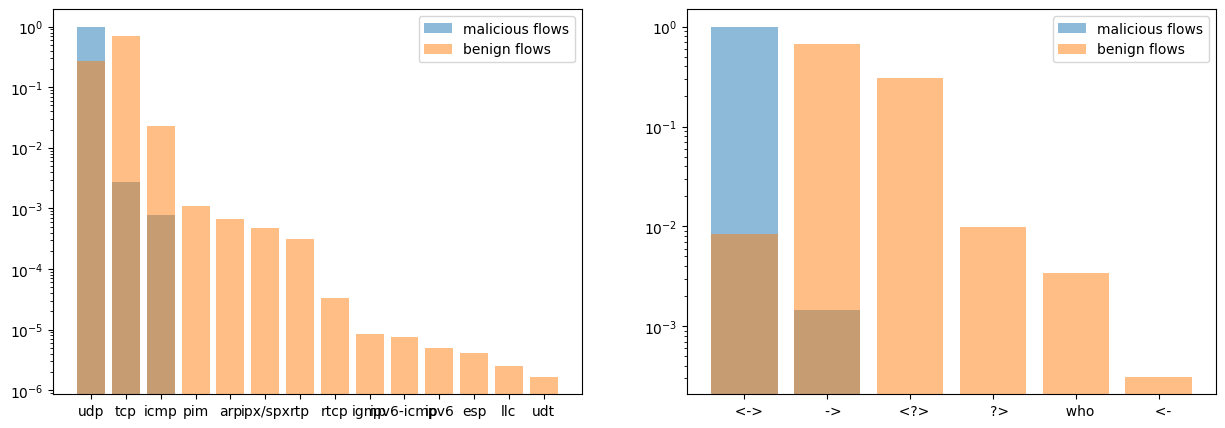

In [13]:
# Visualize the distribution of the features

# Select two features
feature1 = 'Proto'
feature2 = 'Dir'

# Plot the distribution of the features normalized
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# ax[0].hist(malicious_flows[feature1], bins=50, alpha=0.5, label='malicious flows', density=True)
# ax[0].hist(benign_flows[feature1], bins=50, alpha=0.5, label='benign flows', density=True)
ax[0].bar(malicious_flows[feature1].unique(), malicious_flows[feature1].value_counts(normalize=True), alpha=0.5, label='malicious flows')
ax[0].bar(benign_flows[feature1].unique(), benign_flows[feature1].value_counts(normalize=True), alpha=0.5, label='benign flows')
ax[1].bar(malicious_flows[feature2].unique(), malicious_flows[feature2].value_counts(normalize=True), alpha=0.5, label='malicious flows')
ax[1].bar(benign_flows[feature2].unique(), benign_flows[feature2].value_counts(normalize=True), alpha=0.5, label='benign flows')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].legend()
ax[1].legend()

### 1b. Discretize selected features

In [77]:
def netflow_discretize(data_df, feature_maps):
    """Netflow encoding using attribute mappings.

    Attribues:
        data_df (pd.DataFrame): data with features used in discretization
        feature_maps (Dict[str, LabelEncoder]): map of attributes to their encoders
    """
    attr_count = np.prod([len(feature_maps[attr].classes_) for attr in feature_maps])
    codes = []
    for index, row in data_df.iterrows():
        code = 0
        space_size = attr_count
        for col, val in row.items():
            new_space_size = (float(space_size) / float(len(feature_maps[col].classes_)))
            code += feature_maps[col].transform([val])[0] * new_space_size
            space_size = new_space_size
        codes.append(code)
    data_df['code'] = codes
    return data_df

In [78]:
most_evil_host = malicious_flows["SrcAddr"].value_counts().index[0]
most_evil_host

'147.32.84.205'

In [79]:
feat1_enc = LabelEncoder().fit(df[feature1])
feat2_enc = LabelEncoder().fit(df[feature2])
feat_map = {feature1:feat1_enc, feature2:feat2_enc}

host_df = df[df["SrcAddr"] == most_evil_host][[feature1, feature2]]
host_df

,Proto,Dir
172713,udp,<->
172838,udp,<->
172839,tcp,->
172971,udp,<->
172972,udp,->
...,...,...
1279287,tcp,->
1279536,udp,<->
1279537,tcp,->
1279773,udp,<->


In [80]:
discretized_malicious_df = netflow_discretize(host_df, feat_map)
discretized_malicious_df

[['udp' '  <->']
 ['udp' '  <->']
 ['tcp' '   ->']
 ...
 ['tcp' '   ->']
 ['udp' '  <->']
 ['udp' '   ->']]


,Proto,Dir,code
172713,udp,<->,75.0
172838,udp,<->,75.0
172839,tcp,->,66.0
172971,udp,<->,75.0
172972,udp,->,72.0
...,...,...,...
1279287,tcp,->,66.0
1279536,udp,<->,75.0
1279537,tcp,->,66.0
1279773,udp,<->,75.0


In [76]:
benign_hosts_df = benign_flows[[feature1, feature2]]
discretized_benign_df = netflow_discretize(benign_hosts_df, feat_map)
discretized_benign_df

KeyboardInterrupt: 

### 1c. Answers and explanation

## 2. Sketching task – 1/2 A4 (Individual, 10 Points)

### 2a. COUNT-MIN sketch


### 2b. Analysis and answers to the questions

## 3. Min-wise locality sensitive hashing task – 1/2 A4 (Individual, 10 Points)

### 3a. Implementation

### 3b. Analysis and answers to the questions

## 4.Botnet profiling and fingerprinting task – 1 A4 (5 Points)

### 4a. Learn a sequential model, profiling and fingerprinting

### 4b. Analysis and answers to the questions.

## 5. Bonus Task 1/2 A4 (5 Points)

### 5a. Provide implementation and analysis.